<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt


In [11]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',as_frame=False)

In [12]:
X,Y=mnist.data , mnist.target

In [13]:
X.shape

(70000, 784)

In [14]:
def plot_digit(image_data):
  reshape_img=image_data.reshape(28,28)
  plt.imshow(reshape_img,cmap='binary')
  plt.axis('off')


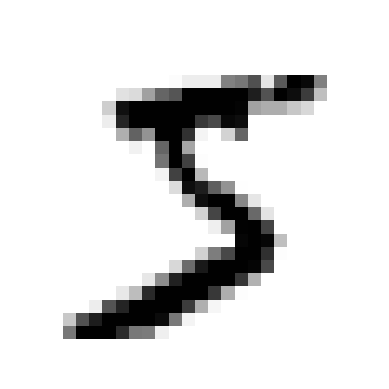

In [15]:
some_digit=X[0]
plot_digit(some_digit)

this is look like 5 let check

In [16]:
Y[0]

'5'

label 1st image is 5 now it proof this above image is 5

In [17]:
X_train,X_test,Y_train,Y_test=X[:60000],X[60000:],Y[:60000],Y[60000:]

above code we make test set and train set with label 60000 image in train and 10000 in test set

In [18]:
y_train_5=(Y_train=='5')
y_test_5=(Y_test=='5')

this will classify number is 5 or not 5


In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

model pridict this image is 5

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.dummy import  DummyClassifier
dummy_clf=DummyClassifier()


In [23]:
dummy_clf.fit(X_train,y_train_5)

DummyClassifier()

In [24]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

this happening because its only 10% are 5 hence model always say not 5 so it 90% correct.

now we use confusion matrix





In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_predict)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
y_train_perfect_predict=y_train_5
confusion_matrix(y_train_5,y_train_perfect_predict)

array([[54579,     0],
       [    0,  5421]])

In [31]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_predict)


0.8370879772350012

In [32]:
recall_score(y_train_5,y_predict)

0.6511713705958311

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_predict)

0.7325171197343847